# Lasso
- Import the libraries including LASSO and Ridge
- Load the ‘mlb.csv’ dataset
- Use salary as the target
- Drop ‘League’, ‘Division’, and ‘NewLeage’ from the features
- Split the dataset into a training and a test dataset including 25% of the data
- Fit a LASSO model. Increase number of iterations if there is no convergence
- Provide the coefficients and the intercept of the LASSO model
- Use different values for alpha = (0, 1000, 100)
- Plot the alphas and coefficients with a log X scale using the gca() method
- Provide the top five predictions based on training and test datasets
- Provide the mean squared error and R2 based on test dataset
- Use the LassoCV algorithm to find the optimal alpha value using cross-validation
= 10 with max_iter=100000
- Provide the alpha value of the LassoCV model (tuned model)
- Provide the prediction and mean squared error of the tuned model
- What are the tuned model coefficients? What variables were not used in the
model and why?

## Import the libraries including LASSO and Ridge

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.model_selection import train_test_split

## Load the ‘mlb.csv’ dataset

In [3]:
df = pd.read_csv("mlb.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [5]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [6]:
df = df.dropna()
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


## Drop ‘League’, ‘Division’, and ‘NewLeage’ from the features

In [7]:
df = df.drop(['League','Division','NewLeague'],axis = 1)

In [8]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


## Use salary as the target

In [9]:
newX=df.drop('Salary',axis=1)

In [10]:
newX

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12


In [11]:
newY = df['Salary']
newY

1       475.0
2       480.0
3       500.0
4        91.5
5       750.0
        ...  
317     700.0
318     875.0
319     385.0
320     960.0
321    1000.0
Name: Salary, Length: 263, dtype: float64

## Split the dataset into a training and a test dataset including 25% of the data

In [12]:
X_train,X_test,y_train,y_test=train_test_split(newX,newY,test_size=0.25,random_state=7)

## Fit a LASSO model. Increase number of iterations if there is no convergence

In [13]:
lasso = Lasso(max_iter = 5000)
lasso.fit(X_train,y_train)

Lasso(max_iter=5000)

In [14]:
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

In [15]:
print("training score:", train_score )
print("test score: ", test_score)
print("number of features used: ", coeff_used)

training score: 0.5627302725026908
test score:  0.29625697765732917
number of features used:  16


## Provide the coefficients and the intercept of the LASSO model

In [16]:
coef = []
coef.append(lasso.coef_)

In [17]:
coef

[array([ -3.31887917,   9.20979989,  -2.16599136,  -0.54007156,
          3.21769641,   6.35914256, -10.24168381,  -0.11191078,
         -0.10584689,  -0.83987498,   1.45813136,   1.20618028,
         -1.03091485,   0.33062822,   0.56881375,  -4.01404794])]

In [18]:
intercept = lasso.intercept_
intercept

231.38114058260567

## Use different values for alpha = (0, 1000, 100)

In [19]:
lasso_A1 = Lasso(max_iter = 10000, alpha=0.1)
lasso_A1.fit(X_train,y_train)
train_score_A1=lasso_A1.score(X_train,y_train)
test_score_A1=lasso_A1.score(X_test,y_test)
print("training score:", train_score_A1 )
print("test score: ", test_score_A1)

training score: 0.5627334262576136
test score:  0.29525899195878746


### Alpha = 0

In [20]:
lasso_A1 = Lasso(max_iter = 10000, alpha=0.1)
lasso_A1.fit(X_train,y_train)
train_score_A1=lasso_A1.score(X_train,y_train)
test_score_A1=lasso_A1.score(X_test,y_test)
print("training score:", train_score_A1 )
print("test score: ", test_score_A1)

training score: 0.5627334262576136
test score:  0.29525899195878746


In [21]:
coef_A1 = []
coef_A1.append(lasso_A1.coef_)
coef_A1

[array([ -3.32779634,   9.2339791 ,  -2.23241074,  -0.55984084,
          3.25279416,   6.36617427, -10.63580227,  -0.1086293 ,
         -0.1156959 ,  -0.8459306 ,   1.46112555,   1.20766858,
         -1.03304241,   0.33086465,   0.56876872,  -4.05487886])]

In [23]:
intercept_A1 = lasso_A1.intercept_
intercept_A1

233.1135808408202

### Alpha = 100

In [24]:
lasso_A2 = Lasso(max_iter = 10000, alpha=100)
lasso_A2.fit(X_train,y_train)
train_score_A2=lasso_A2.score(X_train,y_train)
test_score_A2=lasso_A2.score(X_test,y_test)
print("training score:", train_score_A2 )
print("test score: ", test_score_A2)

training score: 0.5574688499683069
test score:  0.3484271070763537


In [25]:
coef_A2 = []
coef_A2.append(lasso_A2.coef_)
coef_A2

[array([-2.77050878,  8.01961022, -0.        ,  0.        ,  1.58701671,
         5.56660245, -0.        , -0.22113274,  0.30818327, -0.31802601,
         1.20934758,  1.03715462, -0.85489482,  0.3148882 ,  0.45476668,
        -0.        ])]

In [26]:
intercept_A2 = lasso_A2.intercept_
intercept_A2

164.10640778249615

### Alpha = 1000

In [27]:
lasso_A3 = Lasso(max_iter = 10000, alpha=1000)
lasso_A3.fit(X_train,y_train)
train_score_A3=lasso_A3.score(X_train,y_train)
test_score_A3=lasso_A3.score(X_test,y_test)
print("training score:", train_score_A3 )
print("test score: ", test_score_A3)

training score: 0.4933586731687202
test score:  0.4175725752777437


In [28]:
coef_A3 = []
coef_A3.append(lasso_A3.coef_)
coef_A3

[array([ 0.        ,  1.71456768,  0.        ,  0.        ,  0.        ,
         0.        , -0.        , -0.34139477,  0.97583011,  0.        ,
         0.25554456,  0.87779385,  0.        ,  0.2844406 ,  0.21017095,
        -0.        ])]

In [29]:
intercept_A3 = lasso_A3.intercept_
intercept_A3

66.57455295749418

## Plot the alphas and coefficients with a log X scale using the gca() method

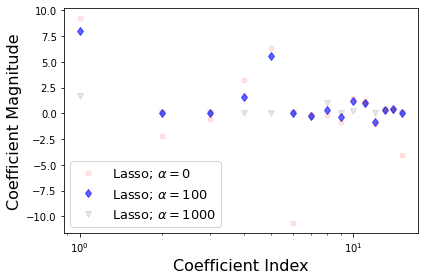

In [30]:
ax = plt.gca()

ax.plot(lasso_A1.coef_,alpha=0.1,linestyle='none',marker='o',markersize=5,color='red',label=r'Lasso; $\alpha = 0$',zorder=7) 
ax.plot(lasso_A2.coef_,alpha=100,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 100$') 
ax.plot(lasso_A3.coef_,alpha=1000,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 1000$') 
ax.set_xscale("log")

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=3)
plt.tight_layout()
plt.show()

## Provide the top five predictions based on training and test datasets

In [31]:
predict0 = lasso.predict(X_test)

In [32]:
predict1 = lasso_A1.predict(X_test)

In [33]:
predict2 = lasso_A2.predict(X_test)

In [34]:
predict3 = lasso_A3.predict(X_test)

In [35]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

LR training score: 0.5627334581162848
LR test score:  0.2951476298948418


In [36]:
predict = lr.predict(X_test)

In [37]:
predict

array([ 551.6177237 ,   81.36472361,  599.17279626,  931.91315552,
        758.47731936,  615.7056123 , 1108.37705569, 1533.63953498,
        593.71967466,  393.50874151,  255.8885665 ,   91.69007759,
        310.01220019,  591.36918078,  371.2306614 ,  807.43617555,
        439.99815125,  233.65498793,  395.05294103,  530.13294109,
        287.87741545,  374.55251937,  687.74286983,  627.47155237,
        737.14444958,  159.97689676,  339.24839731,  177.37372623,
        546.64130761,  355.53322626,  352.20596351,  557.39555696,
        680.88973497,  472.94138628,  252.8247612 ,  336.99578172,
        272.71864857,  424.41928491,  780.450854  ,  567.55033399,
       1225.21341575,  220.81920314,  131.74048044,  585.13351934,
        381.04528886,  612.97493371,  514.95371249,  447.55636349,
        778.57490558,  174.67162233,  676.98315571,   85.06353048,
        490.44199232,  415.31826965,  223.86789964,  803.59997832,
        320.18895539, 1047.8607049 ,  565.13336671,  516.48628

## Provide the mean squared error and R2 based on test dataset

In [38]:
from sklearn.metrics import mean_squared_error, r2_score

In [39]:
print("Mean squared error : %.2f"% mean_squared_error(y_test, predict))
print('R2 : %.2f' % r2_score(y_test, predict))

Mean squared error : 116475.77
R2 : 0.30


In [40]:
print("Mean squared error : %.2f"% mean_squared_error(y_test, predict0))
print('R2 : %.2f' % r2_score(y_test, predict0))

Mean squared error : 116292.45
R2 : 0.30


In [41]:
print("Mean squared error : %.2f"% mean_squared_error(y_test, predict1))
print('R2 : %.2f' % r2_score(y_test, predict1))

Mean squared error : 116457.37
R2 : 0.30


In [42]:
print("Mean squared error : %.2f"% mean_squared_error(y_test, predict2))
print('R2 : %.2f' % r2_score(y_test, predict2))

Mean squared error : 107671.42
R2 : 0.35


In [43]:
print("Mean squared error : %.2f"% mean_squared_error(y_test, predict3))
print('R2 : %.2f' % r2_score(y_test, predict3))

Mean squared error : 96245.24
R2 : 0.42


## Use the LassoCV algorithm to find the optimal alpha value using cross-validation = 10 with max_iter=100000

In [54]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000)
lassocv.fit(X_train, y_train)


LassoCV(cv=10, max_iter=100000)

## Provide the alpha value of the LassoCV model (tuned model)

In [55]:

lasso.set_params(alpha=lassocv.alpha_)


Lasso(alpha=566.1208782855263, max_iter=5000)

## Provide the prediction and mean squared error of the tuned model

In [58]:
predict6 = lassocv.predict(X_test)

In [61]:
print("Mean squared error of Tuned Model : %.2f"% mean_squared_error(y_test, predict6))


Mean squared error of Tuned Model : 96098.81




## What are the tuned model coefficients?

In [62]:
coef_A6 = []
coef_A6.append(lassocv.coef_)
coef_A6

[array([-0.52146686,  3.0757361 ,  0.        ,  0.        ,  0.        ,
         1.30732733, -0.        , -0.35827388,  0.98509971, -0.        ,
         0.3607048 ,  0.93015674, -0.0966487 ,  0.28012312,  0.2631464 ,
        -0.        ])]